$$\begin{equation}
    \begin{cases}
        u_t = u_{xx} + \frac{4x}{x^2 + 2t + 1}u_x, \: 0 \leq x \leq 1,\: 0 < t\\
        u(0, t) = \frac{1}{2t + 1}\\
        u(1, t) = \frac{1}{2t + 2}\\
        u(x, 0) = \frac{1}{x^2 + 1}
    \end{cases}
\end{equation}$$
Методом пристального взгляда выясняем, что точное решение $u(x, t) = \frac{1}{x^2 + 2t + 1}$

Составим явную разностную схему:
$$
\begin{equation}
    \begin{cases}
        \frac{y_m^{n + 1} - y_m^n}{\tau} = \frac{y_{m - 1}^{n} - 2y_m^n + y_{m + 1}^{n}}{h^2} + \frac{4x}{x^2 + 2t + 1} \frac{y_{m + 1}^{n} - y_{m - 1}^{n}}{2h}\\
        y_m^0 = \frac{1}{(mh)^2 + 1}\\
        y_0^n = \frac{1}{2n\tau + 1}\\
        y_M^n = \frac{1}{2(n \tau + 1)}
    \end{cases}
\end{equation}
$$ 
Она обладает первым порядком аппроксимации по времени и вторым по пространству.

Чтобы она была устойчивой должно выполняться, что $\frac{\tau}{h^2} < 0.5$

In [97]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot

In [98]:
num_nodes = 100
T = 0.1
h = 1.0 / num_nodes
M = num_nodes + 1
t = 0.3 * h * h
N = int(T / t) + 1
y_curr = np.zeros((M), dtype = float) 
y_prev = np.zeros((M), dtype = float)
x = [i * h for i in range(0, M)]
for i in range(0, M):
    y_prev[i] = 1.0 / (x[i]**2 + 1)
for n in range(1, N):
    y_curr[0] = 1.0 / (2 * n * t + 1)
    for m in range(1, M - 1):
        y_curr[m] = y_prev[m] + t / h**2 * (y_prev[m - 1] - 2 * y_prev[m] + y_prev[m + 1]) + (2 * t * m) / (x[m]**2 + 2 * n * t + 1) * (y_prev[m + 1] - y_prev[m - 1])
    y_curr[M - 1] = 1.0 / (2 * n * t + 2)
    for m in range(0, M):
        y_prev[m] = y_curr[m]


1.4567803957921122e-05


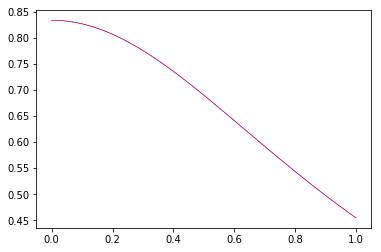

In [99]:
y_exact = [1.0 / (x[i]**2 + 2 * T + 1) for i in range(0, M)]
err = max(abs(y_exact - y_curr))
print(err)
plt.pyplot.plot(x, y_curr, c = 'b', linewidth = 0.5)
plt.pyplot.plot(x, y_exact, c = 'r', linewidth = 0.5)
plt.pyplot.show()

Реализуем схему Кранка-Николсон:
$$
\begin{equation}
    \begin{cases}
        \frac{y_m^{n + 1} - y_m^n}{\tau} = \frac{1}{2}(\frac{y_{m - 1}^{n + 1} - 2y_m^{n + 1} + y_{m + 1}^{n+ 1}}{h^2} + \frac{y_{m - 1}^{n} - 2y_m^n + y_{m + 1}^{n}}{h^2}) + \frac{4x}{x^2 + 2t + 1} \frac{y_{m + 1}^{n} - y_{m - 1}^{n}}{2h}\\
        y_m^0 = \frac{1}{(mh)^2 + 1}\\
        y_0^n = \frac{1}{2n\tau + 1}\\
        y_M^n = \frac{1}{2(n \tau + 1)}
    \end{cases}
\end{equation}
$$ 

Перепишем первое уравнение системы:
$$y_m^{n + 1} (\frac{1}{\tau} + \frac{1}{h^2}) + y_{m - 1}^{n + 1} (-\frac{1}{2h^2}) + y_{m + 1}^{n + 1} (-\frac{1}{2h^2}) = \frac{1}{2}(\frac{y_{m - 1}^{n} - 2y_m^n + y_{m + 1}^{n}}{h^2}) + \frac{4x}{x^2 + 2t + 1} \frac{y_{m + 1}^{n} - y_{m - 1}^{n}}{2h} + y_m^{n}\frac{1}{\tau}$$

Получили на каждом временном слое трехдиагональную систему с диагональным преобладанием.

In [100]:
num_nodes = 1000 #больше точек
T = 0.1 
h = 1.0 / num_nodes
M = num_nodes + 1
t = h
N = int(T / t) + 1
y_curr = np.zeros((M), dtype = float) 
y_prev = np.zeros((M), dtype = float)
x = [i * h for i in range(0, M)]
for i in range(0, M):
    y_prev[i] = 1.0 / (x[i]**2 + 1)
for n in range(1, N):
    A = []
    B = []
    C = []
    F = []
    A.append(0.0)
    B.append(0.0)
    C.append(1.0)
    F.append(1.0 / (2 * n * t + 1))
    for i in range(1, M - 1):
        A.append(- 1.0 / (2 * h * h))
        C.append(1.0 / t + 1.0 / (h * h))
        B.append(- 1.0 / (2 * h * h))
        F.append((1.0 / (2 * h**2)) * (y_prev[i - 1] - 2 * y_prev[i] + y_prev[i + 1]) + ((4 * x[i]) / (x[i]**2 + 2 * n * t + 1) * (y_prev[i + 1] - y_prev[i - 1])) / (2 * h) + y_prev[i] / t)
    A.append(0.0)
    C.append(1.0)
    B.append(0.0)
    F.append(1.0 / (2 * n * t + 2))
    alfa = np.zeros(M, dtype = float)
    beta = np.zeros(M, dtype = float)
    alfa[1] = -B[0] / C[0]
    beta[1] = F[0] / C[0]
    for i in range(2, M):
        alfa[i] = -B[i - 1] / (A[i - 1] * alfa[i - 1] + C[i - 1])
        beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1]) / (A[i - 1] * alfa[i - 1] + C[i - 1])
    y_curr[M - 1] = (F[M - 1] - A[M - 1] * beta[M - 1]) / (C[M - 1] + A[M - 1] * alfa[M - 1])
    for i in range(M - 2, -1, -1):
        y_curr[i] = alfa[i + 1] * y_curr[i + 1] + beta[i + 1]
    for m in range(0, M):
        y_prev[m] = y_curr[m]


3.7430056610721074e-05


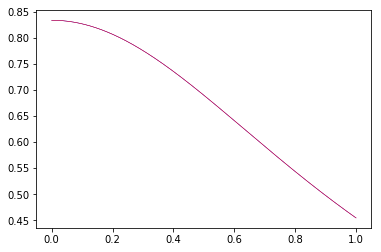

In [101]:
y_exact = [1.0 / (x[i]**2 + 2 * T + 1) for i in range(0, M)]
err = max(abs(y_exact - y_curr))
print(err)
plt.pyplot.plot(x, y_curr, c = 'b', linewidth = 0.5)
plt.pyplot.plot(x, y_exact, c = 'r', linewidth = 0.5)
plt.pyplot.show()

$$y'_t = f(t, y)\\
f_m(t, y) = \frac{y_{m - 1}^{n} - 2y_m^n + y_{m + 1}^{n}}{h^2} + \frac{4mh}{(mh)^2 + 2t + 1} \frac{y_{m + 1}^{n} - y_{m - 1}^{n}}{2h}, \: 1 \leq m < M\\
f_0(t, y) = \frac{1}{2t + 1}\\
f_M(t, y) = \frac{1}{2(t + 1)}\\$$
Используем метод с таблицей Бутчера:
$$\begin{pmatrix}
  \frac{1}{3}& \frac{1}{3}& & &\\
  1& \frac{1}{3}& \frac{2}{3}& &\\
  1& 0& 0& 1& \\
  & \frac{3}{4}& \frac{3}{4}& -\frac{1}{2}&
\end{pmatrix}$$

$\bar k_1 = \bar f(n\tau + \frac{1}{3} \tau, \bar y^n + \frac{1}{3} \tau \bar k_1)$

Получим трехдиагональную систему.

$\bar k_2 = \bar f(n\tau +  \tau, \bar y^n + \frac{1}{3} \tau \bar k_1 + \frac{2}{3} \tau \bar k_2)$

$\bar k_3 = \bar f(n\tau +  \tau, \bar y^n + \tau \bar k_3)$

In [102]:
#решение уравнения типа k = f(time, z + coef * t * k)
def threediagonal_solver(time, z, coef, t, M, h):
    k = np.zeros(M, dtype = float)
    A = []
    B = []
    C = []
    F = []
    A.append(0.0)
    B.append(0.0)
    C.append(1.0)
    F.append(1.0 / (2 * time + 1))
    for i in range(1, M - 1):
        A.append(coef * t * (-1.0 / h**2 + 4 * i * h / ((i * h)**2 + 2 * time + 1)))
        C.append(1.0 + 2 * coef * t / h**2)
        B.append(coef * t * (-1.0 / h**2 - 4 * i * h / ((i * h)**2 + 2 * time + 1)))
        F.append((1.0 / (h**2)) * (z[i - 1] - 2 * z[i] + z[i + 1]) + ((4 * i * h) / ((i * h)**2 + 2 * time + 1) * (z[i + 1] - z[i - 1])) / (2 * h))
    A.append(0.0)
    C.append(1.0)
    B.append(0.0)
    F.append(1.0 / (2 * time + 2))
    alfa = np.zeros(M, dtype = float)
    beta = np.zeros(M, dtype = float)
    alfa[1] = -B[0] / C[0]
    beta[1] = F[0] / C[0]
    for i in range(2, M):
        alfa[i] = -B[i - 1] / (A[i - 1] * alfa[i - 1] + C[i - 1])
        beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1]) / (A[i - 1] * alfa[i - 1] + C[i - 1])
    k[M - 1] = (F[M - 1] - A[M - 1] * beta[M - 1]) / (C[M - 1] + A[M - 1] * alfa[M - 1])
    for i in range(M - 2, -1, -1):
        k[i] = alfa[i + 1] * k[i + 1] + beta[i + 1]
    return k

In [103]:
num_nodes = 100
T = 0.1 
h = 1.0 / num_nodes
M = num_nodes + 1
t = 0.0001#приходиться брать малнькое время
N = int(T / t) + 1
y_curr = np.zeros((M), dtype = float) 
y_prev = np.zeros((M), dtype = float)
x = [i * h for i in range(0, M)]
for i in range(0, M):
    y_prev[i] = 1.0 / (x[i]**2 + 1)
for n in range(1, N):
    k_1 = threediagonal_solver(n * t + t / 3, y_prev, 1.0 / 3, t, M, h)
    k_2 = threediagonal_solver(n * t + t, y_prev + 1.0 / 3 * t * k_1, 2.0 / 3, t, M, h)
    k_3 = threediagonal_solver(n * t + t, y_prev, 1.0, t, M, h)
    y_curr = y_prev + t * (3.0 / 4 * k_1 + 3.0 / 4 * k_2 - 1.0 / 2 * k_3)
    y_curr[0] = 1.0 / (2 * n * t + 1)#без этих строчек разъезжались значения на концах
    y_curr[M - 1] = 1.0 / (2 * n * t + 2)#
    for m in range(0, M):
        y_prev[m] = y_curr[m]


0.00011644244168207418


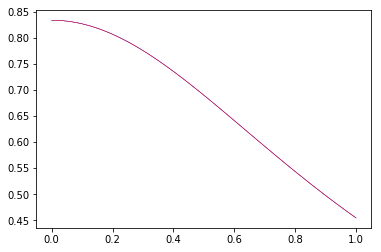

In [104]:
y_exact = [1.0 / (x[i]**2 + 2 * T + 1) for i in range(0, M)]
err = max(abs(y_exact - y_curr))
print(err)
plt.pyplot.plot(x, y_curr, c = 'b', linewidth = 0.5)
plt.pyplot.plot(x, y_exact, c = 'r', linewidth = 0.5)
plt.pyplot.show()